<a href="https://colab.research.google.com/github/SiweiLuo/DL_with_Python/blob/master/CH03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn import __version__ as sklearn_version
from distutils.version import LooseVersion

print('version =',LooseVersion(sklearn_version)) 

if LooseVersion(sklearn_version) < LooseVersion('0.18'):
  raise ValueError('Please use scikit-learn 0.18 or newer') 

version = 0.21.2


In [0]:
from IPython.display import Image
%matplotlib inline 

In [7]:
from sklearn import datasets 
import numpy as np 

iris = datasets.load_iris() 
x = iris.data[:,[2,3]]
y = iris.target

print('Class labels:',np.unique(y)) 

Class labels: [0 1 2]


In [0]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.3,random_state=1,stratify=y) 

In [9]:
print('Labels counts in y:',np.bincount(y)) 
print('Labels counts in y_train:',np.bincount(y_train)) 
print('Labels counts in y_test',np.bincount(y_test)) 

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test [15 15 15]


In [0]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler() 
sc.fit(x_train)
x_train_std = sc.transform(x_train) 
x_test_std = sc.transform(x_test) 

In [13]:
from sklearn.linear_model import Perceptron 

ppn = Perceptron(max_iter=40,eta0=0.1,random_state=1) 
ppn.fit(x_train_std,y_train) 

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
y_pred = ppn.predict(x_test_std) 
print('Misclassified samples: %d' %(y_test != y_pred).sum()) 

Misclassified samples: 1


In [15]:
from sklearn.metrics import accuracy_score 

print('Accuracy: %.2f' % accuracy_score(y_test,y_pred)) 

Accuracy: 0.98


In [16]:
print('Accuracy: %.2f' % ppn.score(x_test_std,y_test)) 

Accuracy: 0.98


In [0]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt 

def plot_decision_regions(x,y,classifier,test_idx=None,resolution=0.02):
  
  markers = ('s','x','o','^','v') 
  colors = ('red','blue','lightgreen','gray','cyan') 
  cmap = ListedColormap(colors[:len(np.unique(y))]) 
  
  x1_min,x1_max = x[:,0].min() - 1,x[:,0].max() +1 
  x2_min,x2_max = x[:,1].min() - 1,x[:,1].max() + 1 
  xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                        np.arange(x2_min,x2_max,resolution))
  z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T) 
  z = z.reshape(xx1.shape) 
  plt.contourf(xx1,xx2,z,alpha=0.3,cmap=cmap) 
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max()) 
  
  for idx,cl in enumerate(np.unique(y)):
    plt.scatter(x=x[y==cl,0],
                y=x[y==cl,1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black') 
    if test_idx: 
      x_test,y_test = x[test_idx,:],y[test_idx]
      plt.scatter(x_test[:,0],
                  x_test[:,1],
                  c='',
                  edgecolor='black',
                  alpha=1.0,
                  linewidth=1,
                  marker='o',
                  s=100,
                  label='test set') 

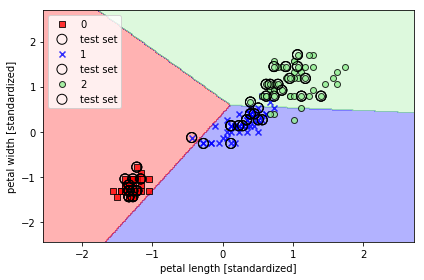

In [20]:
x_combined_std = np.vstack((x_train_std,x_test_std)) 
y_combined = np.hstack((y_train,y_test)) 

plot_decision_regions(x=x_combined_std,y=y_combined,
                      classifier=ppn,test_idx=range(105,150)) 

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]') 
plt.legend(loc='upper left') 

plt.tight_layout() 
plt.show() 


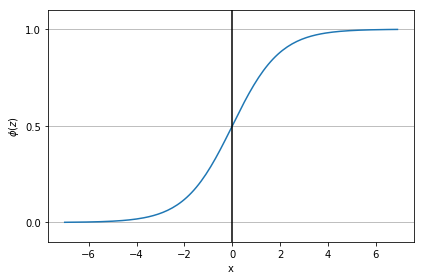

In [21]:
import matplotlib.pyplot as plt 
import numpy as np 


def sigmoid(z):
  return 1.0/(1.0 +np.exp(-z)) 

z = np.arange(-7,7,0.1) 
phi_z = sigmoid(z) 

plt.plot(z,phi_z) 
plt.axvline(0.0,color='k') 
plt.ylim(-0.1,1.1) 
plt.xlabel('x') 
plt.ylabel('$\phi (z)$') 

plt.yticks([0.0,0.5,1.0]) 
ax = plt.gca() 
ax.yaxis.grid(True) 

plt.tight_layout() 
plt.show() 

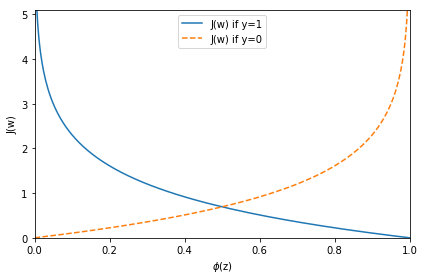

In [22]:
def cost_1(z):
  return -np.log(sigmoid(z)) 

def cost_0(z):
  return -np.log(1-sigmoid(z)) 

z = np.arange(-10,10,0.1) 
phi_z = sigmoid(z) 

c1 = [cost_1(x) for x in z]
plt.plot(phi_z,c1,label='J(w) if y=1') 

c0 = [cost_0(x) for x in z] 
plt.plot(phi_z,c0,linestyle='--',label='J(w) if y=0') 

plt.ylim(0.0,5.1) 
plt.xlim([0,1])
plt.xlabel('$\phi$(z)') 
plt.ylabel('J(w)') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show() 


In [0]:
class LogisticRegressionGD(object): 
  def __init__(self,eta=0.05,n_iter=100,random_state=1):
    self.eta = eta 
    self.n_iter = n_iter
    self.random_state = random_state
    
  def fit(self,x,y):
    rgen = np.random.RandomState(self.random_state) 
    self.w_ = rgen.normal(loc=0.0,scale=0.01,size=1+x.shape[1]) 
    self.cost_ = [] 
    
    for i in range(self.n_iter):
      net_input = self.net_input(x) 
      output = self.activation(net_input)
      errors = (y-output) 
      self.w_[1:] += self.eta *x.T.dot(errors) 
      self.w_[0] += self.eta*errors.sum() 
    
      cost = -y.dot(np.log(output))-((1-y).dot(np.log(1-output)))
      self.cost_.append(cost) 
    
  def net_input(self,x):
    return np.dot(x,self.w_[1:])+self.w_[0]
  
  def activation(self,z):
    return 1./(1.+np.exp(-np.clip(z,-250,250))) 
  
  def predict(self,x):
    return np.where(self.net_input(x) >=0.0 ,1, 0 ) 
  

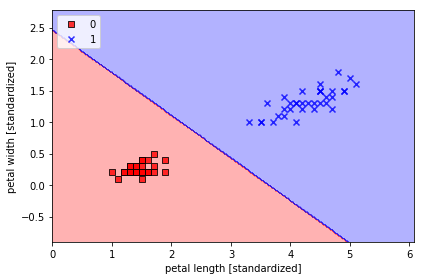

In [26]:
x_train_01_subset = x_train[(y_train==0) | (y_train==1)] 
y_train_01_subset = y_train[(y_train==0) | (y_train==1)] 

lrgd = LogisticRegressionGD(eta=0.05,n_iter=1000,random_state=1) 
lrgd.fit(x_train_01_subset,
         y_train_01_subset) 

plot_decision_regions(x=x_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd) 

plt.xlabel('petal length [standardized]') 
plt.ylabel('petal width [standardized]') 
plt.legend(loc='upper left') 
plt.tight_layout() 
plt.show() 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


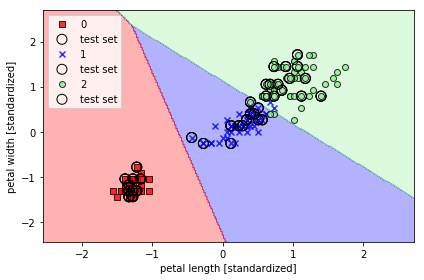

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0,random_state=1) 
lr.fit(x_train_std,y_train) 

plot_decision_regions(x_combined_std,y_combined,
                      classifier=lr,test_idx=range(105,150)) 

plt.xlabel('petal length [standardized]') 
plt.ylabel('petal width [standardized]') 
plt.legend(loc='upper left') 
plt.tight_layout() 

plt.show() 

In [28]:
lr.predict_proba(x_test_std[:3,:]) 

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

In [29]:
lr.predict_proba(x_test_std[:3,:]).sum(axis=1) 


array([1., 1., 1.])

In [30]:
lr.predict_proba(x_test_std[:3,:]).argmax(axis=1) 



array([2, 0, 0])

In [31]:
lr.predict(x_test_std[:3,:]) 

array([2, 0, 0])

In [32]:
lr.predict(x_test_std[0,:].reshape(1,-1)) 

array([2])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

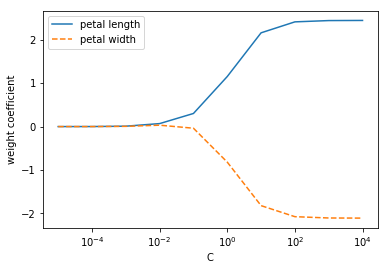

In [33]:
weights,params = [],[] 

for c in np.arange(-5,5): 
  lr = LogisticRegression(C=10.**c,random_state=1) 
  lr.fit(x_train_std,y_train) 
  weights.append(lr.coef_[1]) 
  params.append(10.**c) 
  
weights = np.array(weights) 
plt.plot(params,weights[:,0],
         label='petal length') 
plt.plot(params,weights[:,1],linestyle='--',
         label='petal width') 
plt.ylabel('weight coefficient') 
plt.xlabel('C') 
plt.legend(loc='upper left') 
plt.xscale('log') 
plt.show() 

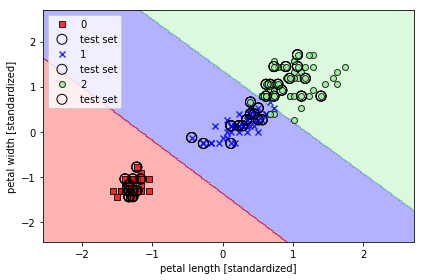

In [34]:
from sklearn.svm import SVC 

svm =SVC(kernel='linear',C=1.0,random_state=1) 
svm.fit(x_train_std,y_train) 

plot_decision_regions(x_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105,150)) 

plt.xlabel('petal length [standardized]') 
plt.ylabel('petal width [standardized]') 
plt.legend(loc='upper left') 
plt.tight_layout() 

plt.show() 

In [0]:
from sklearn.linear_model import SGDClassifier 

ppn = SGDClassifier(loss='perceptron',max_iter=1000) 
lr = SGDClassifier(loss='log',max_iter=1000) 
svm = SGDClassifier(loss='hinge',max_iter=1000) 




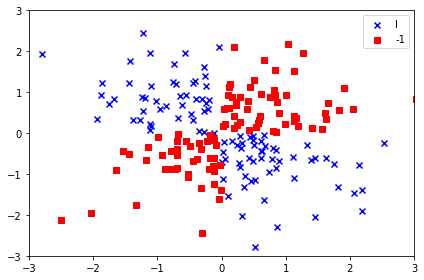

In [45]:
import matplotlib.pyplot as plt 
import numpy as np 

np.random.seed(1) 

x_xor = np.random.randn(200,2)
y_xor = np.logical_xor(x_xor[:,0]>0,
                       x_xor[:,1]>0) 

y_xor = np.where(y_xor,1,-1) 

plt.scatter(x_xor[y_xor==1,0],
            x_xor[y_xor==1,1],
            c='b',marker='x',
            label='l')

plt.scatter(x_xor[y_xor==-1,0],
            x_xor[y_xor==-1,1],
            c='r',
            marker='s',
            label='-1') 

plt.xlim([-3,3]) 

plt.ylim([-3,3]) 
plt.legend(loc='best') 

plt.tight_layout()

plt.show() 

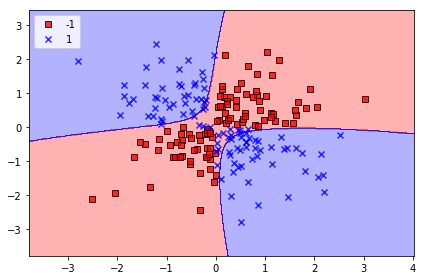

In [46]:
svm = SVC(kernel='rbf',random_state=1,gamma=0.1,C=10.0) 
svm.fit(x_xor,y_xor) 
plot_decision_regions(x_xor,y_xor,
                      classifier=svm) 

plt.legend(loc='upper left') 
plt.tight_layout() 

plt.show() 

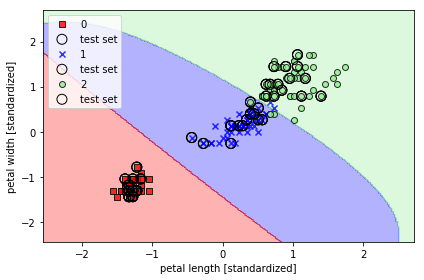

In [48]:
from sklearn.svm import SVC 

svm = SVC(kernel='rbf',random_state=1,gamma=0.2,C=1.0) 
svm.fit(x_train_std,y_train) 

plot_decision_regions(x_combined_std,y_combined,
                      classifier=svm,test_idx=range(105,150)) 

plt.xlabel('petal length [standardized]') 
plt.ylabel('petal width [standardized]') 
plt.legend(loc='upper left') 
plt.tight_layout() 

plt.show() 

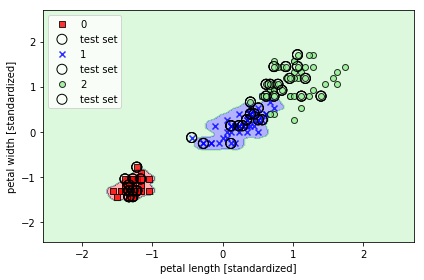

In [49]:
svm = SVC(kernel='rbf',random_state=1,gamma=100.0,C=1.0) 
svm.fit(x_train_std,y_train) 

plot_decision_regions(x_combined_std,y_combined,
                      classifier=svm,test_idx=range(105,150)) 

plt.xlabel('petal length [standardized]') 
plt.ylabel('petal width [standardized]') 
plt.legend(loc='upper left') 
plt.tight_layout() 
plt.show() 


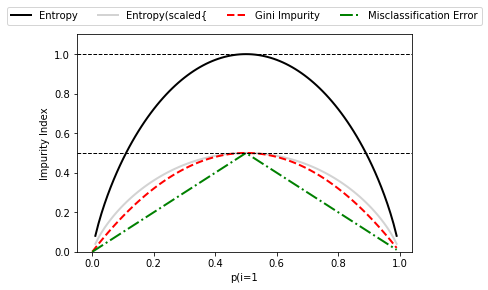

In [51]:
import matplotlib.pyplot as plt 

import numpy as np 


def gini(p):
  return p*(1-p) + (1-p)*(1-(1-p)) 

def entropy(p):
  return -p*np.log2(p) - (1-p)*np.log2((1-p)) 

def error(p):
  return 1 - np.max([p,1-p]) 

x = np.arange(0.0,1.0,0.01) 


ent = [entropy(p) if p != 0 else None for p in x] 
sc_ent = [e*0.5 if e else None for e in ent] 
err = [error(i) for i in x] 

fig = plt.figure() 
ax = plt.subplot(111) 
for i, lab,ls,c, in zip([ent ,sc_ent,gini(x),err],
                        ['Entropy','Entropy(scaled{',
                         'Gini Impurity','Misclassification Error'],
                        ['-','-','--','-.'],
                        ['black','lightgray','red','green','cyan']):
  line = ax.plot(x,i,label=lab,linestyle=ls,lw=2,color=c)
  
ax.legend(loc='upper center',bbox_to_anchor=(0.5,1.15),
          ncol=5,fancybox=True,shadow=False) 

ax.axhline(y=0.5,linewidth=1,color='k',linestyle='--') 
ax.axhline(y=1.0,linewidth=1,color='k',linestyle='--') 

plt.ylim([0,1.1]) 
plt.xlabel('p(i=1') 
plt.ylabel('Impurity Index') 

plt.show() 

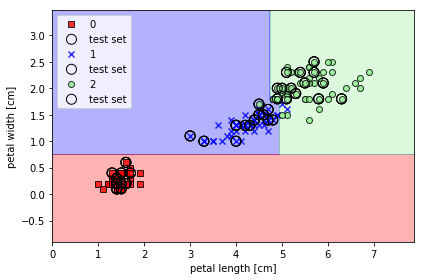

In [52]:
from sklearn.tree import DecisionTreeClassifier 

tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=4,
                              random_state=1) 

tree.fit(x_train,y_train) 

x_combined = np.vstack((x_train,x_test)) 
y_combined = np.hstack((y_train,y_test)) 

plot_decision_regions(x_combined,y_combined,
                      classifier=tree,test_idx=range(105,150)) 

plt.xlabel('petal length [cm]') 
plt.ylabel('petal width [cm]') 
plt.legend(loc='upper left') 
plt.tight_layout() 

plt.show() 
    



In [53]:
from pydotplus import graph_from_dot_data 
from sklearn.tree import export_graphviz 

dot_data = export_graphviz(tree,
                           filled=True,
                           rounded=True,
                           class_names=['Setosa',
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length',
                                          'petal width'],
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

True

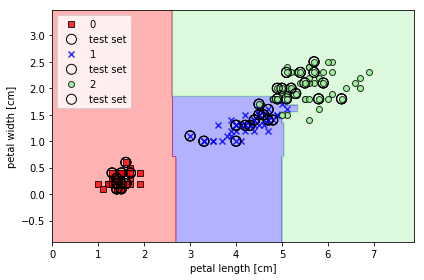

In [54]:
from sklearn.ensemble import RandomForestClassifier 

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=1,
                                n_jobs=2) 

forest.fit(x_train,y_train) 

plot_decision_regions(x_combined,y_combined,
                      classifier=forest,test_idx=range(105,150)) 

plt.xlabel('petal length [cm]') 
plt.ylabel('petal width [cm]') 

plt.legend(loc='upper left') 
plt.tight_layout() 

plt.show() 

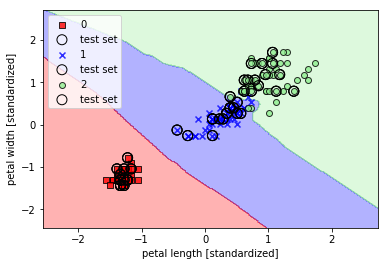

In [55]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=5,
                           p=2,
                           metric='minkowski') 

knn.fit(x_train_std,y_train)

plot_decision_regions(x_combined_std,y_combined,
                      classifier=knn,test_idx=range(105,150)) 

plt.xlabel('petal length [standardized]') 
plt.ylabel('petal width [standardized]') 

plt.legend(loc='upper left') 

plt.show() 